In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('movies_data.csv')

df.head()

,Unnamed: 0,movie_name,rating_target_audience,genre,release_year,release_date,release_year_and_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,The Shining,R,Drama,1980,June 13,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,July 2,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,July 2,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,July 25,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4000 non-null   int64  
 1   movie_name                4000 non-null   object 
 2   rating_target_audience    3960 non-null   object 
 3   genre                     4000 non-null   object 
 4   release_year              4000 non-null   int64  
 5   release_date              4000 non-null   object 
 6   release_year_and_country  3947 non-null   object 
 7   score                     3947 non-null   float64
 8   votes                     3947 non-null   float64
 9   director                  3947 non-null   object 
 10  writer                    3947 non-null   object 
 11  star                      3946 non-null   object 
 12  country                   3947 non-null   object 
 13  budget                    3947 non-null   float64
 14  gross   

In [4]:
df.drop(columns=['Unnamed: 0', 'release_year_and_country'], axis= 1, inplace= True)
df.head()

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June 13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July 2,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July 2,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July 25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.describe(include='all')

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
count,4000,3960,4000,4000.000000,4000,3947.000000,3.947000e+03,3947,3947,3946,3947,3.947000e+03,3.786000e+03,3937,3940.000000
unique,3971,11,17,NaN,407,NaN,NaN,1663,2659,1626,44,NaN,NaN,1280,NaN
top,Hamlet,R,Comedy,NaN,December 25,NaN,NaN,Woody Allen,Stephen King,Robert De Niro,United States,NaN,NaN,Universal Pictures,NaN
freq,3,2043,1355,NaN,49,NaN,NaN,22,27,27,2952,NaN,NaN,191,NaN
mean,NaN,NaN,NaN,1991.191500,NaN,6.318596,5.515430e+04,NaN,NaN,NaN,NaN,1.561524e+07,4.220456e+07,NaN,105.736294
std,NaN,NaN,NaN,5.934529,NaN,0.977161,1.436098e+05,NaN,NaN,NaN,NaN,2.257366e+07,9.303727e+07,NaN,18.546272
min,NaN,NaN,NaN,1980.000000,NaN,2.200000,5.100000e+01,NaN,NaN,NaN,NaN,0.000000e+00,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1986.000000,NaN,5.700000,4.400000e+03,NaN,NaN,NaN,NaN,0.000000e+00,3.013546e+06,NaN,94.000000
50%,NaN,NaN,NaN,1991.000000,NaN,6.400000,1.400000e+04,NaN,NaN,NaN,NaN,7.500000e+06,1.221649e+07,NaN,102.000000
75%,NaN,NaN,NaN,1996.000000,NaN,7.000000,4.600000e+04,NaN,NaN,NaN,NaN,2.200000e+07,3.629985e+07,NaN,114.000000


In [6]:
df.isnull().sum()

movie_name                  0
rating_target_audience     40
genre                       0
release_year                0
release_date                0
score                      53
votes                      53
director                   53
writer                     53
star                       54
country                    53
budget                     53
gross                     214
company                    63
runtime                    60
dtype: int64

In [7]:
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

df['rating_target_audience'].fillna('other', inplace=True)
df['director'].fillna('other', inplace=True)
df['writer'].fillna('other', inplace=True)
df['star'].fillna('other', inplace=True)
df['country'].fillna('other', inplace=True)
df['company'].fillna('other', inplace=True)

In [8]:
df.isnull().sum()

movie_name                0
rating_target_audience    0
genre                     0
release_year              0
release_date              0
score                     0
votes                     0
director                  0
writer                    0
star                      0
country                   0
budget                    0
gross                     0
company                   0
runtime                   0
dtype: int64

# VISUALIZE DISTRIBUTION

<module 'matplotlib.pyplot' from 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

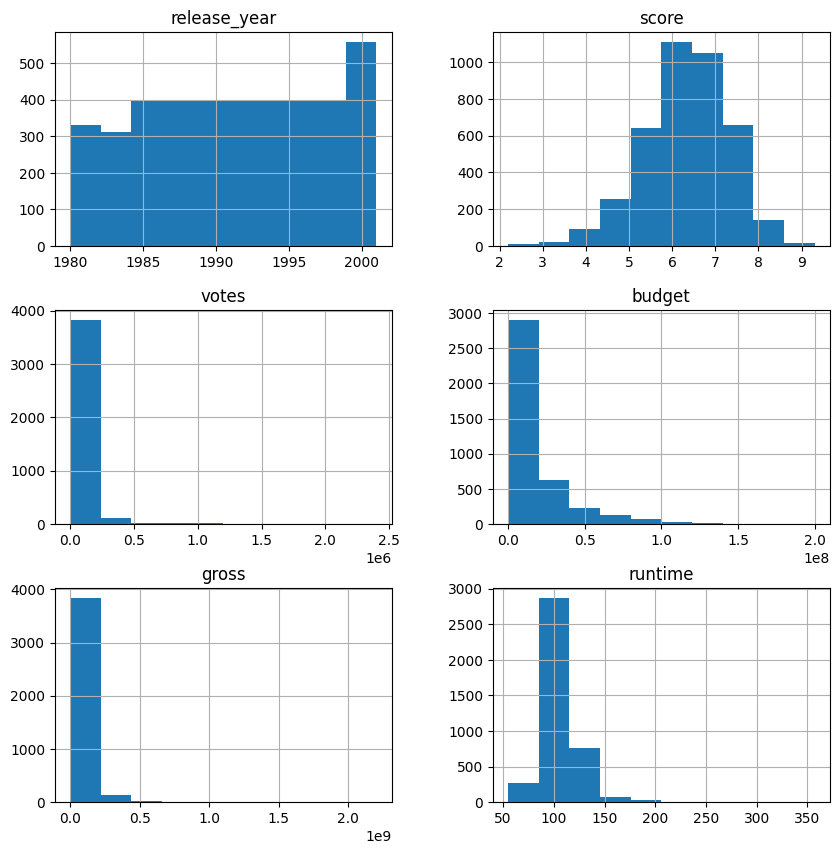

In [9]:
df.hist(figsize=(10, 10))
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\hp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

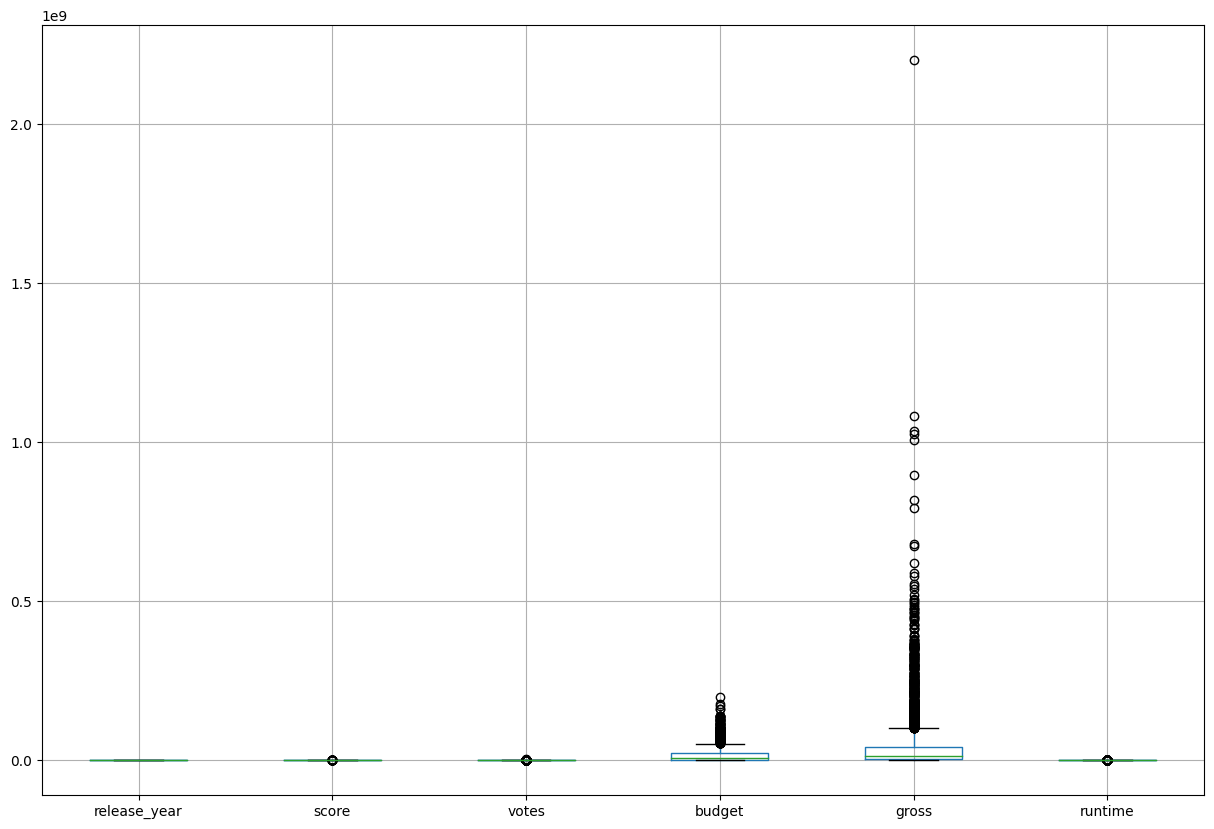

In [10]:
df.boxplot(figsize=(15, 10))
plt

<Axes: >

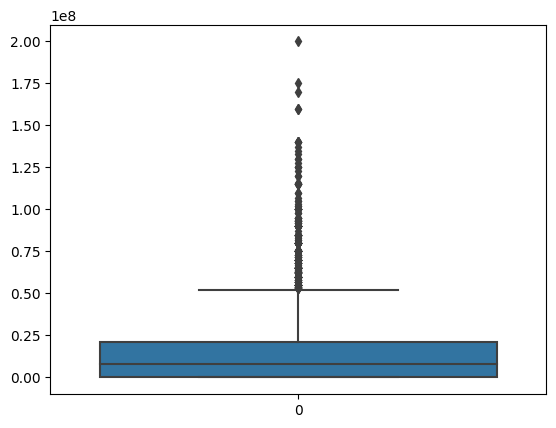

In [11]:
sns.boxplot(df['budget'])

<Axes: >

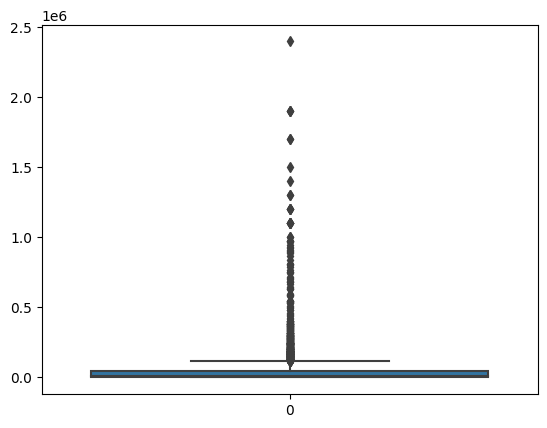

In [12]:
sns.boxplot(df['votes'])

<Axes: >

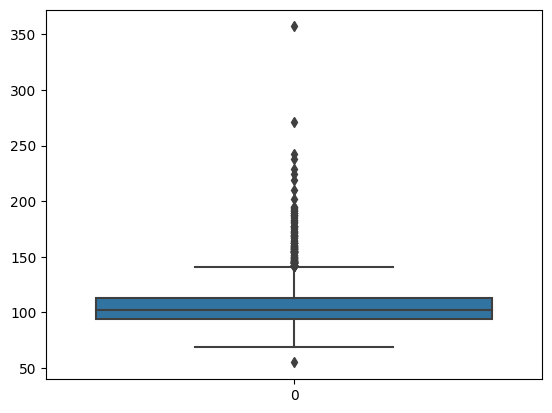

In [13]:
sns.boxplot(df['runtime'])

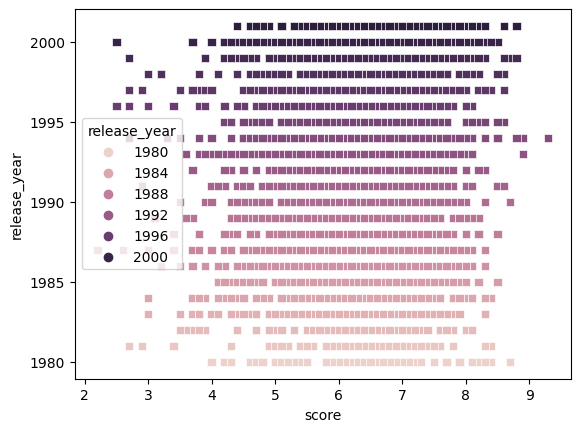

In [14]:
sns.scatterplot(x='score',
                y='release_year',
                data=df,
                hue='release_year',
                marker='s')
plt.show()

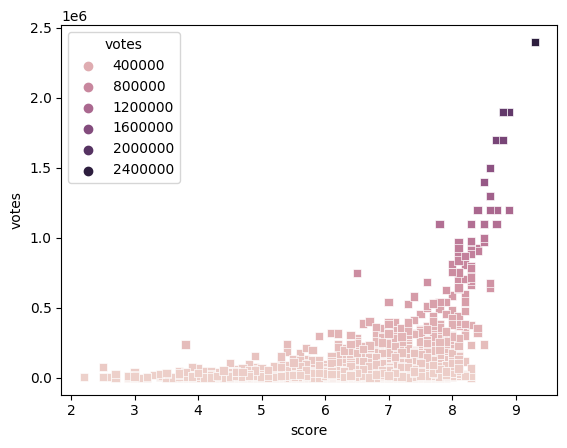

In [15]:
sns.scatterplot(x='score',
                y='votes',
                data=df,
                hue='votes',
                marker='s')
plt.show()

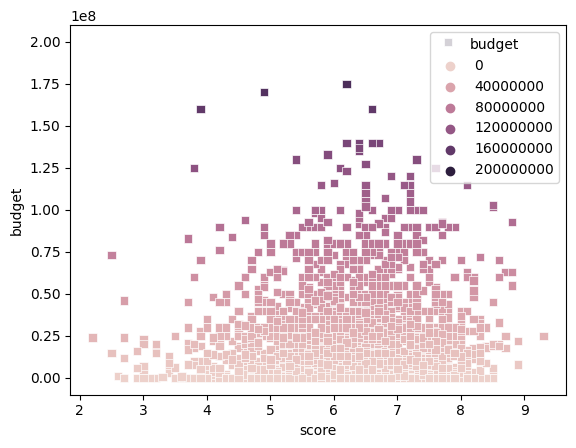

In [16]:
sns.scatterplot(x='score',
                y='budget',
                data=df,
                hue='budget',
                marker='s')
plt.show()

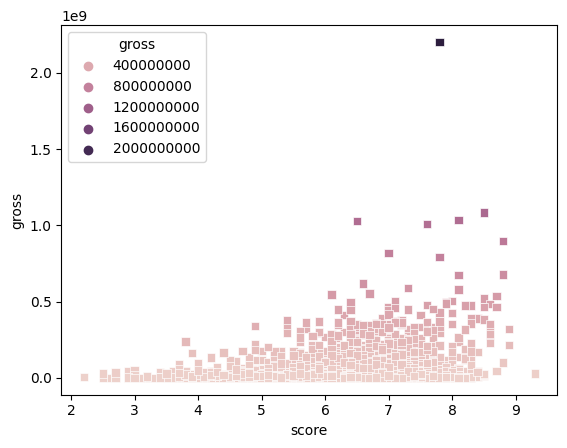

In [17]:
sns.scatterplot(x='score',
                y='gross',
                data=df,
                hue='gross',
                marker='s')
plt.show()

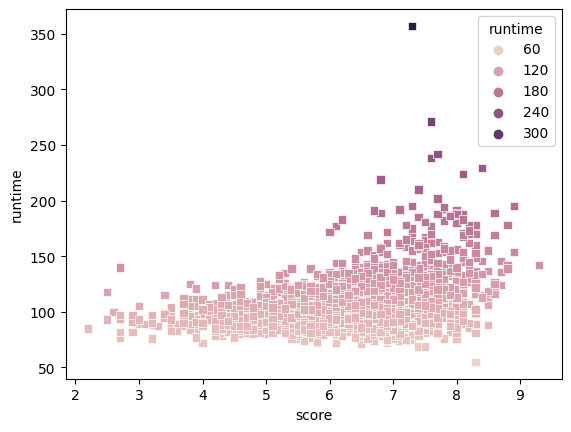

In [18]:
sns.scatterplot(x='score',
                y='runtime',
                data=df,
                hue='runtime',
                marker='s')
plt.show()

# GROUPING

In [19]:
df.head()

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June 13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July 2,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June 20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July 2,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July 25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
directors_grouped = df.groupby(['director'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()
directors_grouped

,director,movie_name
0,other,53
1,Woody Allen,22
2,Clint Eastwood,16
3,Directors,16
4,Barry Levinson,16
...,...,...
1659,Lance Young,1
1660,Lang Elliott,1
1661,Larry Bishop,1
1662,Buck Henry,1


FINDING TOP 20 DIRECTORS

In [21]:
directors_grouped = df.groupby(['director'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()
directors_grouped
top20_directors = directors_grouped.head(20).values


FINDING TOP 20 WRITERS

In [22]:
writers_grouped = df.groupby(['writer'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()
top20_writers = writers_grouped.head(20).values

FINDING TOP 20 ACTORS

In [23]:
stars_grouped = df.groupby(['star'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()
top20_stars = stars_grouped.head(20).values

FINDING TOP 20 COMPANIES

In [24]:
company_grouped = df.groupby(['company'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()
top20_companies = company_grouped.head(20).values

GROUPING GENRES

In [25]:
countries_grouped = df.groupby(['country'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()

countries_grouped.head(20)

,country,movie_name
0,United States,2952
1,United Kingdom,384
2,France,141
3,Canada,98
4,other,53
5,Australia,52
6,Italy,44
7,Japan,44
8,Germany,43
9,Hong Kong,26


In [26]:
genre_grouped = df.groupby(['genre'])[['movie_name']].count().sort_values(by = ["movie_name"], ascending=False).reset_index()

genre_grouped

,genre,movie_name
0,Comedy,1355
1,Drama,807
2,Action,775
3,Crime,302
4,Adventure,231
5,Biography,175
6,Horror,158
7,Animation,113
8,Fantasy,33
9,Mystery,13


In [27]:
gross_of_director = df.groupby('director').gross.mean()
gross_of_writer = df.groupby('writer').gross.mean()
gross_of_star = df.groupby('star').gross.mean()

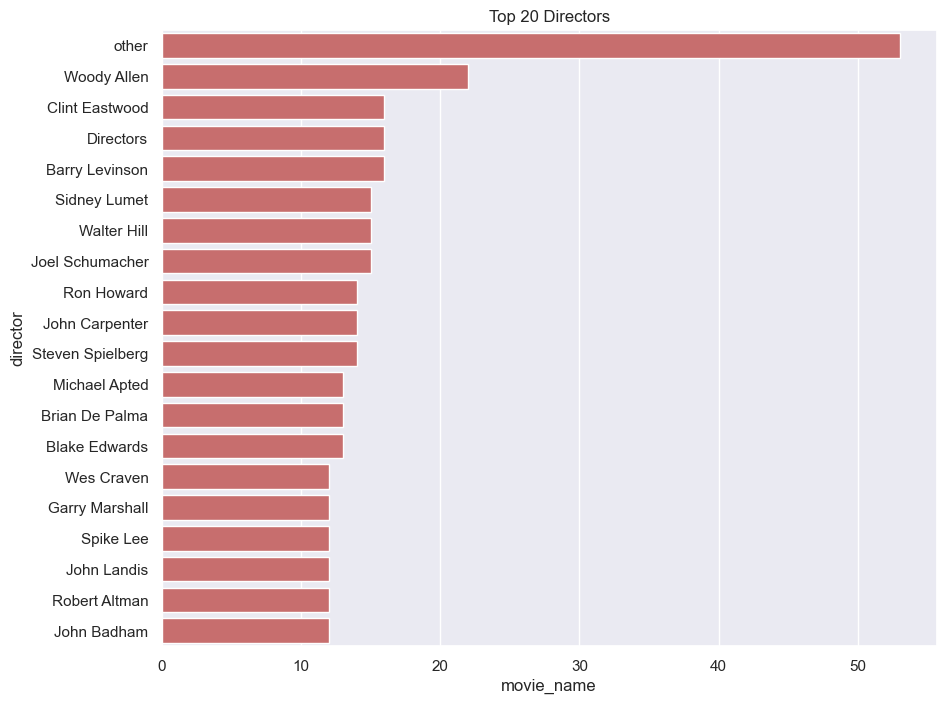

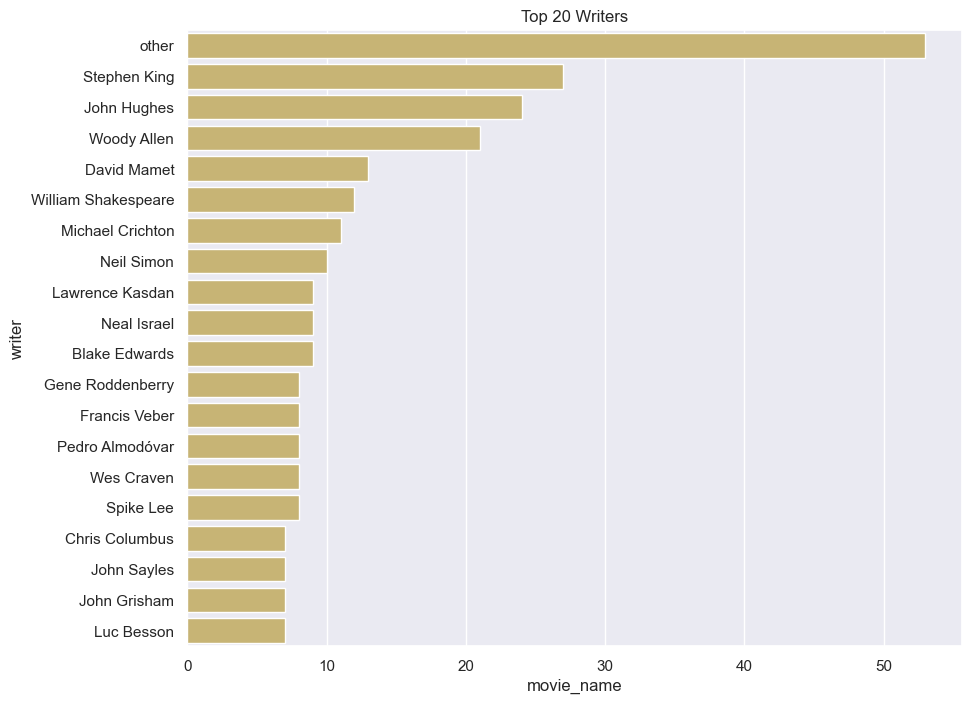

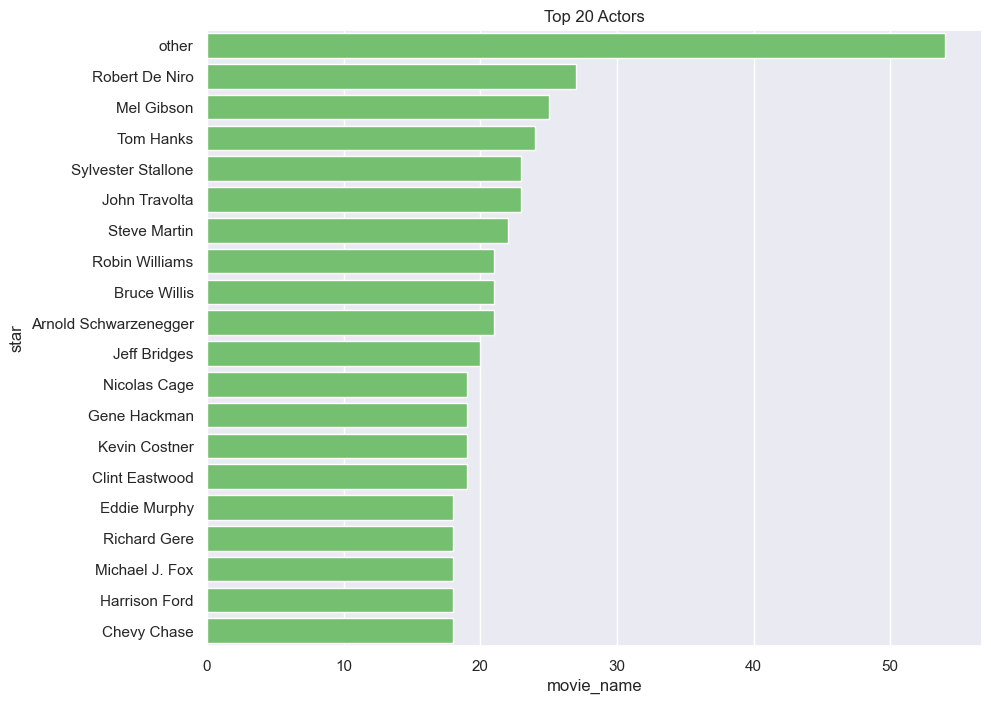

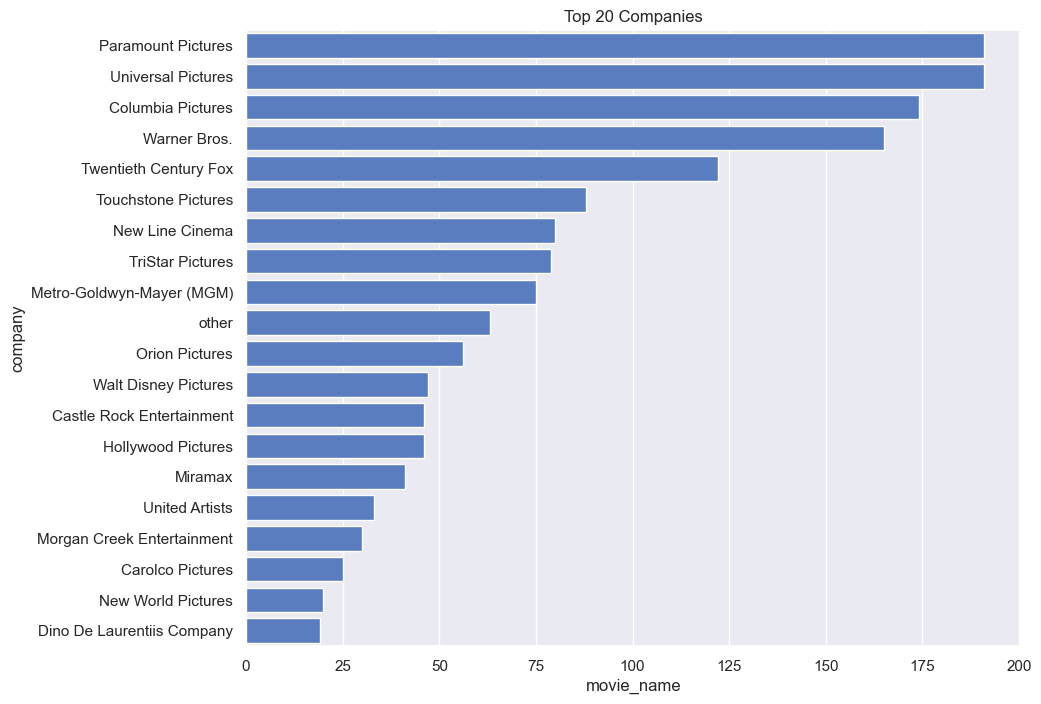

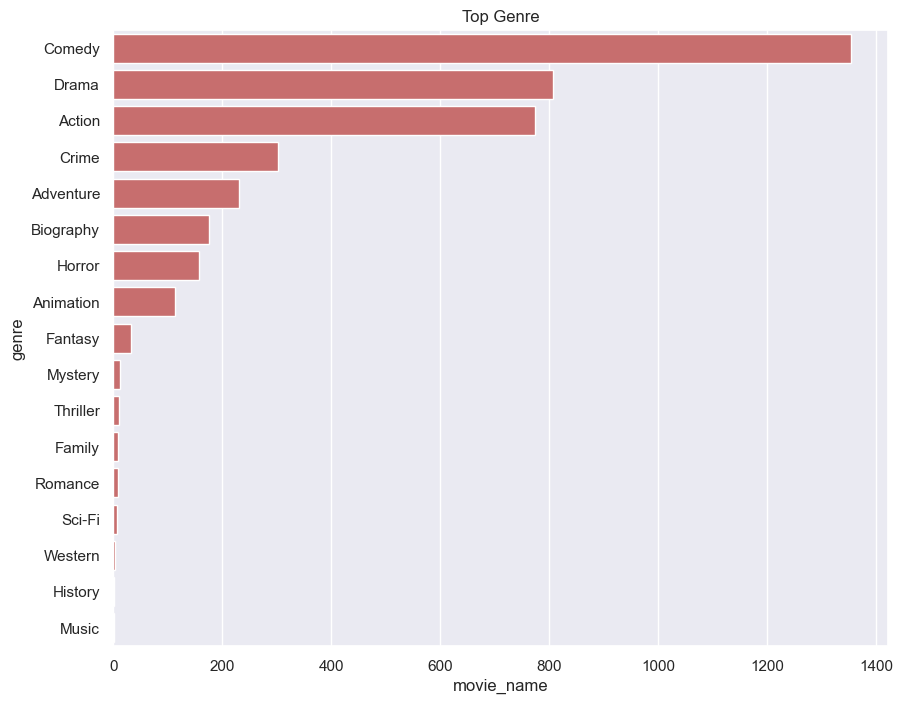

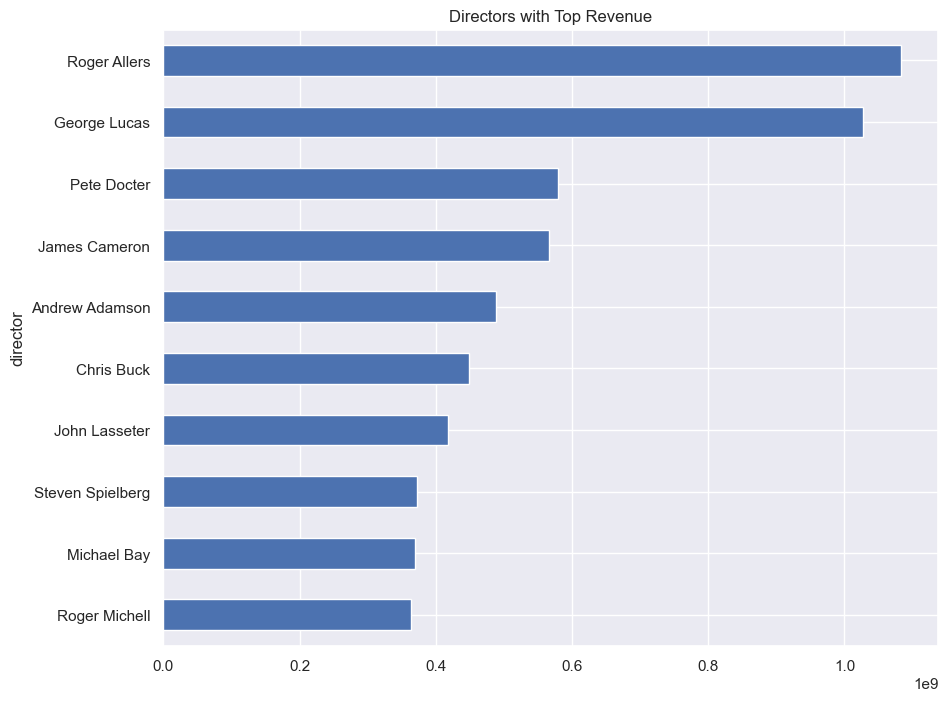

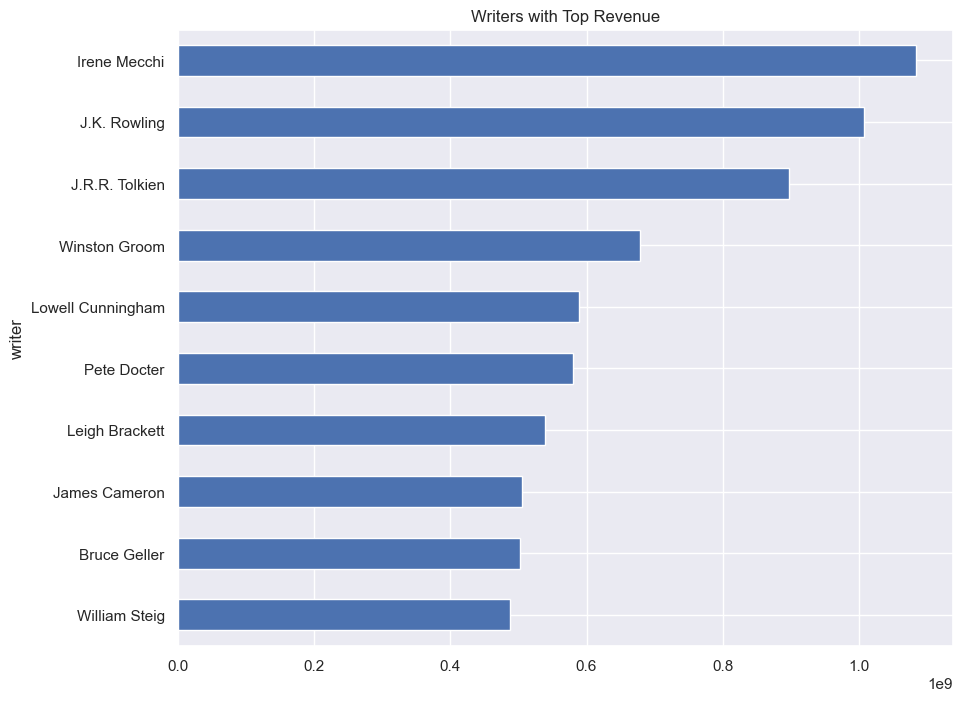

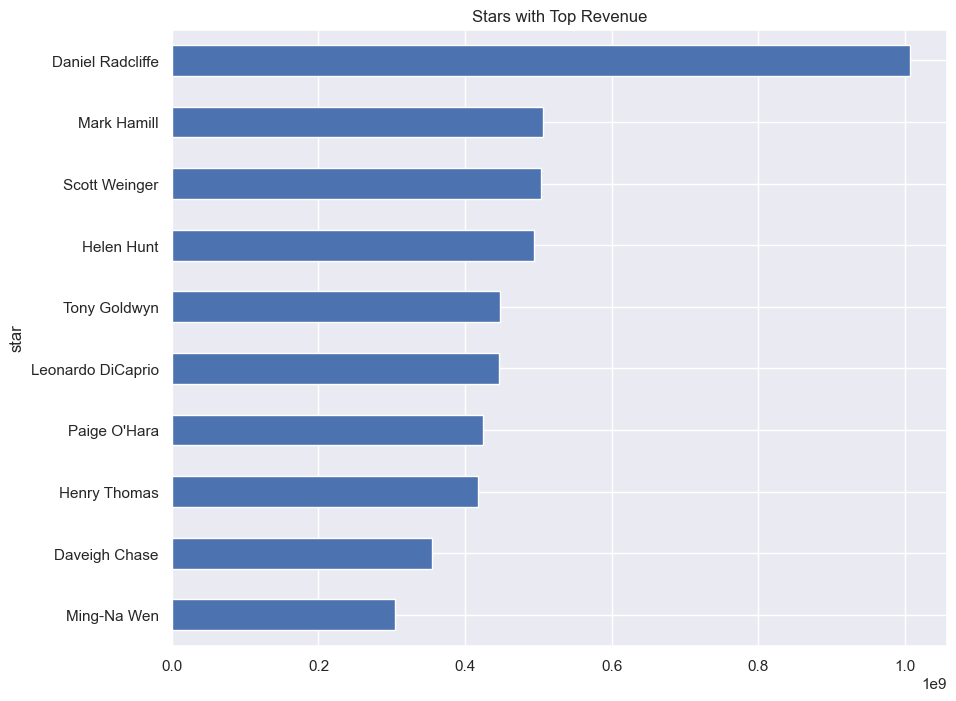

In [28]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="movie_name", y="director", data= directors_grouped.head(20), color="r")
plt.title("Top 20 Directors")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="movie_name", y="writer", data= writers_grouped.head(20), color="y")
plt.title("Top 20 Writers")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="movie_name", y="star", data= stars_grouped.head(20), color="g")
plt.title("Top 20 Actors")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="movie_name", y="company", data= company_grouped.head(20), color="b")
plt.title("Top 20 Companies")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
sns.barplot(x="movie_name", y="genre", data= genre_grouped.head(20), color="r")
plt.title("Top Genre")
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
gross_of_director.sort_values().tail(10).plot(kind = 'barh', title = 'Directors with Top Revenue')
plt.show()

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
gross_of_writer.sort_values().tail(10).plot(kind = 'barh', title = 'Writers with Top Revenue')
plt.show()


sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 8))
sns.set_color_codes("muted")
gross_of_star.sort_values().tail(10).plot(kind = 'barh', title = 'Stars with Top Revenue')
plt.show()



In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#Independent variables
X = df[['release_year', 'votes', 'budget', 'gross', 'runtime']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

        feature        VIF
0  release_year  35.616900
1         votes   1.854856
2        budget   2.293517
3         gross   2.532233
4       runtime  37.909784


'runtime' shows collinearlity with 'release_year'

# FEATURE ENGINEERING

In [31]:
def release_decade(x):
    if x >= 1980 and x <= 1989:
        return "80's"
    elif x >= 1990 and x <= 1999:
        return "90's"
    elif x > 1999:
        return "2000's"

In [32]:
def rating_level(x):
    if x >= 0 and x < 4:
        return 'Bad'
    elif x>=4 and x < 7:
        return "Average"
    elif x>= 7 and x <= 10:
        return "Good"

In [33]:
Europe = ['United Kingdom', 'West Germany', 'Italy', 'Soviet Union', 'France', 'Sweden', 'Spain', 'Switzerland', 'Netherlands', 'Hungary', 'Yugoslavia', 'Ireland', 'Denmark', 'Germany', 'Belgium', 'Austria', 'Portugal', 'Republic of Macedonia', 'Russia', 'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic', 'Norway']
North_America = ['United States', 'Canada', 'Mexico', 'Jamaica', 'Aruba']
Africa = ['South Africa', 'Libya']
Oceania =['Australia', 'New Zealand']
Asia = ['Hong Kong', 'South Korea', 'Philippines', 'Israel', 'Japan', 'Iran', 'China', 'Taiwan', 'Vietnam', 'India']
South_America =['Brazil', 'Argentina']
Other = ['other']

In [34]:
def continents(country):
    if country in Europe:
        return 'Europe'
    elif country in North_America:
        return 'North_America'
    elif country in Africa:
        return 'Africa'
    elif country in Oceania:
        return 'Oceania'
    elif country in Asia:
        return 'Asia'
    elif country in South_America:
        return 'South_America'
    else:
        return 'Other'

In [35]:
df['release_decade'] = df['release_year'].apply(release_decade)
df['rating'] = df['score'].apply(rating_level)
df['continent'] = df['country'].apply(continents)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_name              4000 non-null   object 
 1   rating_target_audience  4000 non-null   object 
 2   genre                   4000 non-null   object 
 3   release_year            4000 non-null   int64  
 4   release_date            4000 non-null   object 
 5   score                   4000 non-null   float64
 6   votes                   4000 non-null   float64
 7   director                4000 non-null   object 
 8   writer                  4000 non-null   object 
 9   star                    4000 non-null   object 
 10  country                 4000 non-null   object 
 11  budget                  4000 non-null   float64
 12  gross                   4000 non-null   float64
 13  company                 4000 non-null   object 
 14  runtime                 4000 non-null   

In [37]:
df['continent'].value_counts()

continent
North_America    3063
Europe            715
Asia               97
Oceania            62
Other              53
Africa              5
South_America       5
Name: count, dtype: int64

In [38]:
df.groupby('rating')['movie_name'].count().reset_index()

,rating,movie_name
0,Average,2868
1,Bad,72
2,Good,1060


Gross and movie name were included in the predictor variables.

Gross was not included because we want to predict the score of the movie before it has come out and so gross earnings cannot be included in the model.

Movie names column was not included in the model because it showed no impact on accuracy when the model was run with it or without it

In [39]:
cat_columns = ['rating_target_audience', 'genre', 'director', 'writer', 'star', 'continent', 'release_decade', 'company']
num_columns = ['budget', 'runtime', 'votes']
target = ['rating']

In [40]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_columns), ('cat', cat_transformer, cat_columns)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['budget', 'runtime', 'votes']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['rating_target_audience', 'genre', 'director',
                                  'writer', 'star', 'continent',
                                  'release_decade', 'company'])])

In [41]:
X = df[num_columns + cat_columns]
y = df[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 123)

RANDOM FOREST CLASSIFIER

In [43]:
rf = RandomForestClassifier()

In [44]:
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

In [45]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [46]:
rf_accuracy = accuracy_score(y_test, y_pred)

print(f"RANDOM FOREST CLASSIFIER ACCURACY: {rf_accuracy: .2f}")

RANDOM FOREST CLASSIFIER ACCURACY:  0.85


RANDOM FOREST CLASSIFIER W/ RANDOM SEARCH

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}
print(random_grid)

{'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]}


In [48]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['budget', 'runtime',
                                                   'votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating_target_audience',
                                                   'genre', 'director',
                                                   'writer', 'star',
                                                   'continent',
                                                   'release_decade',
                                                   'company'])])),
                ('classifier', RandomForestClassifier())])

In [49]:
rf_random = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['budget',
                                                                                'runtime',
                                                                                'votes']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['rating_target_audience',
                                                                                'genre',
                                                                                'director',
                                                                                'writer',
                                                                                'star',
                                                                                'continent',
                                                                                'release_decade',
                                                                                'com...
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50, 60,
                                                                  70, 80, 90,
                                                                  100, 110,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000]},
                   random_state=42, verbose=2)

In [50]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]} 

Best Parameters:  {'classifier__n_estimators': 1000, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 80, 'classifier__bootstrap': False}  



In [51]:
rf_random_best = rf_random.best_estimator_
y_pred = rf_random_best.predict(X_test)
rf_random_best_accuracy = accuracy_score(y_test, y_pred)
print(f" RANDOM FOREST W/ RANDOM SEARCH Accuracy: {rf_random_best_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


 RANDOM FOREST W/ RANDOM SEARCH Accuracy: 0.84875
Classification Report:
              precision    recall  f1-score   support

     Average       0.84      0.98      0.91       589
         Bad       0.00      0.00      0.00        14
        Good       0.92      0.50      0.65       197

    accuracy                           0.85       800
   macro avg       0.58      0.50      0.52       800
weighted avg       0.84      0.85      0.83       800



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

KNN CLASSIFIER

In [52]:
knn_classifier = KNeighborsClassifier()


In [53]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])
knn_pipeline.fit(X_train, y_train)


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['budget', 'runtime',
                                                   'votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating_target_audience',
                                                   'genre', 'director',
                                                   'writer', 'star',
                                                   'continent',
                                                   'release_decade',
                                                   'company'])])),
                ('classifier', KNeighborsClassifier())])

In [54]:
y_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

     Average       0.84      0.94      0.89       589
         Bad       0.00      0.00      0.00        14
        Good       0.74      0.52      0.61       197

    accuracy                           0.82       800
   macro avg       0.53      0.49      0.50       800
weighted avg       0.80      0.82      0.80       800



KNN CLASSIFIER W/ RANDOM SEARCH

In [55]:
k_range = list(range(1,30))
param_grid = {
    'classifier__n_neighbors': k_range,
    'classifier__weights': ['uniform', 'distance']
}

In [56]:
knn_random_search = RandomizedSearchCV(knn_pipeline, param_distributions= param_grid , n_iter = 5, cv = 10, verbose=2, random_state=42, n_jobs = -1)
knn_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['budget',
                                                                                'runtime',
                                                                                'votes']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['rating_target_audience',
                                                                                'genre',
                                                                                'director',
                                                                                'writer',
                                                                                'star',
                                                                                'continent',
                                                                                'release_decade',
                                                                                'company'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'classifier__n_neighbors': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19, 20,
                                                                    21, 22, 23,
                                                                    24, 25, 26,
                                                                    27, 28,
                                                                    29],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   random_state=42, verbose=2)

In [57]:
best_k = knn_random_search.best_params_['classifier__n_neighbors']
best_weight = knn_random_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

best_k:  7
best_weight:  distance


In [58]:
knn_random_best = knn_random_search.best_estimator_

# Model Evaluation
y_pred = knn_random_best.predict(X_test)
knn_random_search_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN RANDOM SEARCH Accuracy: {knn_random_search_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN RANDOM SEARCH Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

     Average       0.83      0.94      0.89       589
         Bad       0.00      0.00      0.00        14
        Good       0.75      0.51      0.60       197

    accuracy                           0.82       800
   macro avg       0.53      0.48      0.50       800
weighted avg       0.80      0.82      0.80       800



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

KNN CLASSIFIER W/ GRID SEARCH

In [59]:
knn_grid_search = GridSearchCV(knn_pipeline, param_grid=param_grid, cv = 10, scoring='accuracy', return_train_score= True)
knn_grid_search.fit(X_train, y_train)

best_k = knn_grid_search.best_params_['classifier__n_neighbors']
best_weight = knn_grid_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversi

In [ ]:
knn_grid_best = knn_grid_search.best_estimator_

# Model Evaluation
y_pred = knn_grid_best.predict(X_test)
knn_grid_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN W/ GRID SEARCH Accuracy: {knn_grid_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN W/ GRID SEARCH Accuracy: 0.815
Classification Report:
              precision    recall  f1-score   support

     Average       0.84      0.93      0.88       589
         Bad       0.00      0.00      0.00        14
        Good       0.71      0.54      0.61       197

    accuracy                           0.81       800
   macro avg       0.52      0.49      0.50       800
weighted avg       0.79      0.81      0.80       800



NAIVE BAYES

In [ ]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_columns), 
    ('cat', cat_transformer, cat_columns)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
nb_random_search_accuracy = accuracy_score(y_test, y_pred)
print("NB accuracy:",nb_random_search_accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NB accuracy: 0.60125
[[361  41 187]
 [  9   3   2]
 [ 73   7 117]]
              precision    recall  f1-score   support

     Average       0.81      0.61      0.70       589
         Bad       0.06      0.21      0.09        14
        Good       0.38      0.59      0.47       197

    accuracy                           0.60       800
   macro avg       0.42      0.47      0.42       800
weighted avg       0.70      0.60      0.63       800



In [ ]:
gnb = GaussianNB()
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid_search = GridSearchCV(gnb, param_grid=params_nb, cv = 5, scoring='accuracy', return_train_score= True)
x_transformed= preprocessor.fit_transform(X_train)

nb_grid_search.fit(x_transformed, y_train)


print('best_nb: ', nb_grid_search.best_estimator_)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConver

best_nb:  GaussianNB(var_smoothing=0.1873817422860384)


In [ ]:
# Assuming you have already performed the grid search and obtained the best estimator
nb_grid_best = nb_grid_search.best_estimator_

# Transform the test data using the preprocessor (assuming preprocessor was fit on training data)
x_test_transformed = preprocessor.transform(X_test)

# Make predictions on the transformed test data
y_pred = nb_grid_best.predict(x_test_transformed)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
nb_grid_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model with the best estimator found from the grid search
print(f"NB W/ GRID SEARCH Accuracy: {nb_grid_accuracy}")

# Print the classification report which includes precision, recall, F1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))


NB W/ GRID SEARCH Accuracy: 0.79375
Classification Report:
              precision    recall  f1-score   support

     Average       0.79      0.97      0.87       589
         Bad       0.00      0.00      0.00        14
        Good       0.85      0.31      0.45       197

    accuracy                           0.79       800
   macro avg       0.55      0.43      0.44       800
weighted avg       0.79      0.79      0.76       800

